In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npa
import seaborn as sns
import statistics as ss
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# importing data
data = pd.read_csv("wallmartsales.csv")

# Converting raw(csv) data to DataFrame
df = pd.DataFrame(data)


In [5]:
#Analyzing structure of data

print(df.head())

   store       Date1  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
# Analyzing data types

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   Date1         6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [8]:
# Convering date column to its Dtype

df["Date1"] = pd.to_datetime(df["Date1"], format= "mixed")

print(df["Date1"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date1
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB
None


In [6]:
# Dealing with null values if present

print(df.isnull().sum())

store           0
Date1           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [22]:
# Easy Level:

# 1. What are the summary statistics (mean, median, standard deviation) for Weekly_Sales, Temperature, Fuel_Price, CPI, and Unemployment?
summary_stats = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

print("Mean Values: \n",summary_stats.mean())
print("\n\nMedian Values: \n",summary_stats.median())
print("\n\nStandard Deviation: \n",summary_stats.std())

Mean Values: 
 Weekly_Sales    1.046965e+06
Temperature     6.066378e+01
Fuel_Price      3.358607e+00
CPI             1.715784e+02
Unemployment    7.999151e+00
dtype: float64


Median Values: 
 Weekly_Sales    960746.040000
Temperature         62.670000
Fuel_Price           3.445000
CPI                182.616521
Unemployment         7.874000
dtype: float64


Standard Deviation: 
 Weekly_Sales    564366.622054
Temperature         18.444933
Fuel_Price           0.459020
CPI                 39.356712
Unemployment         1.875885
dtype: float64


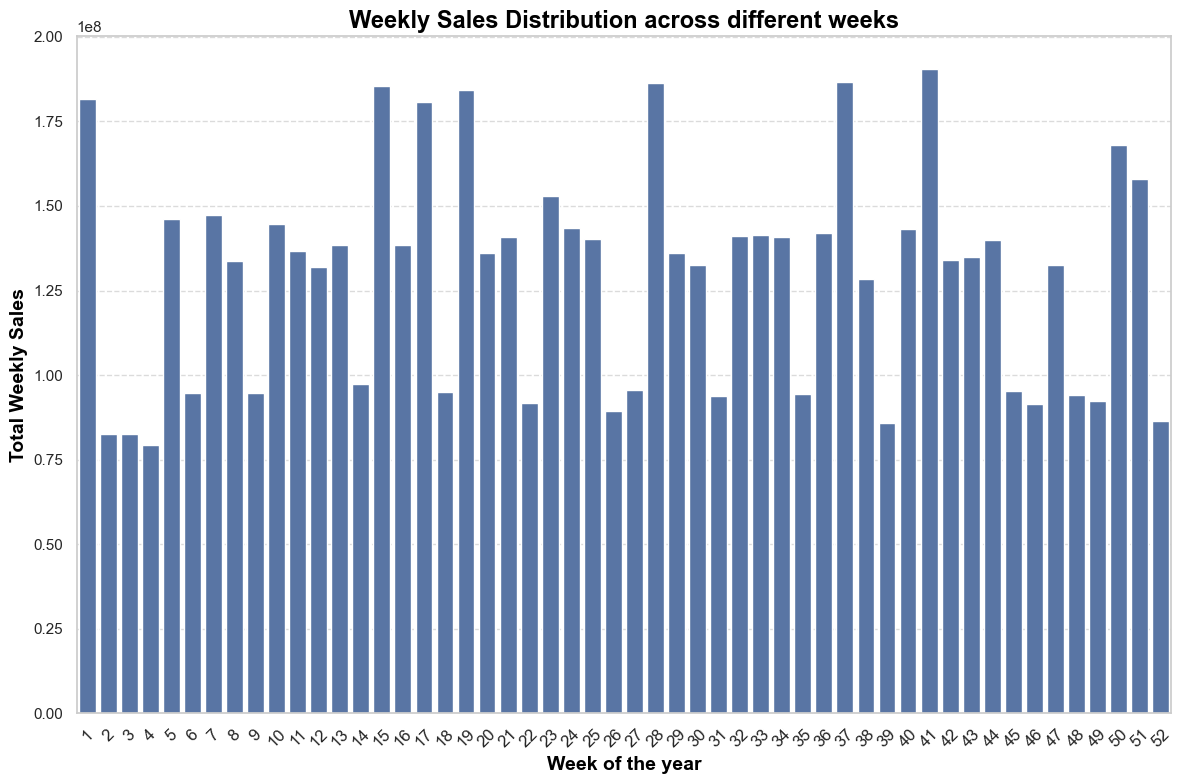

In [9]:
# 2. How does the distribution of Weekly_Sales vary across different weeks?

# Creating a new column which shows week of year
df["Weeks"] = df["Date1"].dt.isocalendar().week

# Summarizing data by Weeks and sales
by_weeks = df.groupby("Weeks")["Weekly_Sales"].sum()

#Plotting bar plot
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")  # Set style for the plot

sns.barplot(x= by_weeks.index, y= by_weeks.values)
plt.xlabel("Week of the year", fontsize= 14, fontweight= "bold", color= "black")
plt.ylabel("Total Weekly Sales", fontsize= 14, fontweight= "bold", color= "black")
plt.title("Weekly Sales Distribution across different weeks", fontsize= 17, fontweight= "bold", color= "black")
plt.xticks(rotation= 45, fontsize= 12)
plt.grid(True, axis= "y", ls="--", alpha= 0.7)

plt.tight_layout()
plt.show()


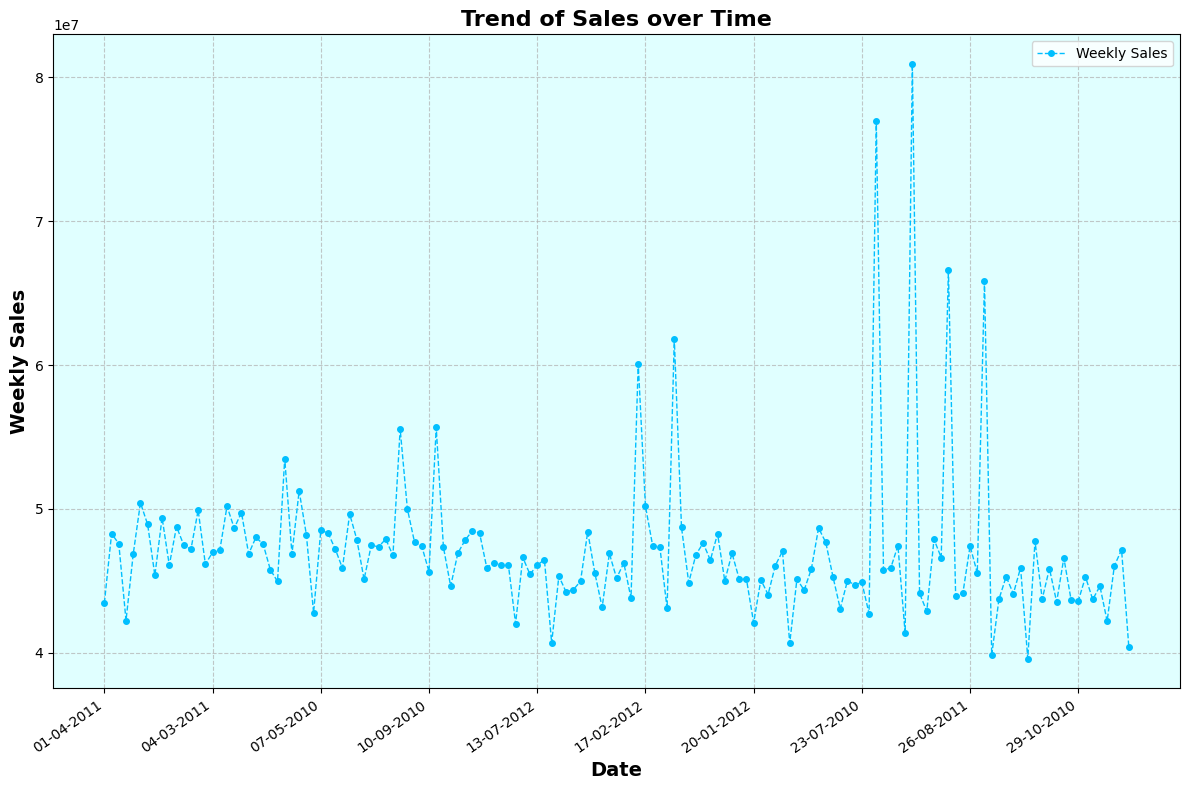

In [4]:
# 3. What is the trend of Weekly_Sales over time?

# Summarizing data by Weeks and sales
by_weeks = df.groupby("Date1").agg({"Weekly_Sales" : "sum"}).sort_values(by="Date1")

plt.figure(figsize=(12,8))
plt.plot(by_weeks.index, by_weeks.values, marker="o", ls="--", color="deepskyblue", markersize= 4, linewidth= 1, label="Weekly Sales")
plt.xlabel("Date", fontsize= 14, fontweight= "bold", color= "black")
plt.ylabel("Weekly Sales", fontsize= 14, fontweight= "bold", color= "black")
plt.title("Trend of Sales over Time", fontsize= 16, fontweight= "bold", color= "black")

# Limit the number of values at x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=15))  # Adjust number of ticks
plt.xticks(rotation = 35, ha="right")
plt.legend()

#Adding background colors
plt.gca().set_facecolor('lightcyan')

plt.grid(True, ls="--", alpha=0.7)

# Saving image
plt.savefig("trend of sales.png")

plt.tight_layout()
plt.show()

Correlation:
               Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000 




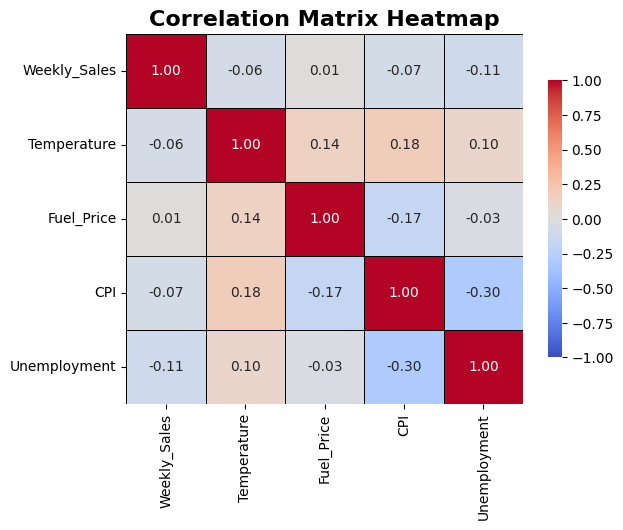

In [5]:
# Intermediate Level:

# 1. Is there a correlation between Weekly_Sales and other variables such as Temperature, Fuel_Price, CPI, and Unemployment?
oth_var = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

print("Correlation:\n",oth_var.corr(), "\n\n")

#Visualization of correlation

sns.heatmap(oth_var.corr(), vmin= -1, vmax= 1, center= 0, annot= True, cmap="coolwarm", fmt=".2f",
           linewidths= 0.5, linecolor= "black", cbar_kws={"shrink" : .75})

# Add titles and labels
plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight='bold', color='black')

# Saving image
plt.savefig("Correlation Matrix Heatmap.png")

plt.show()


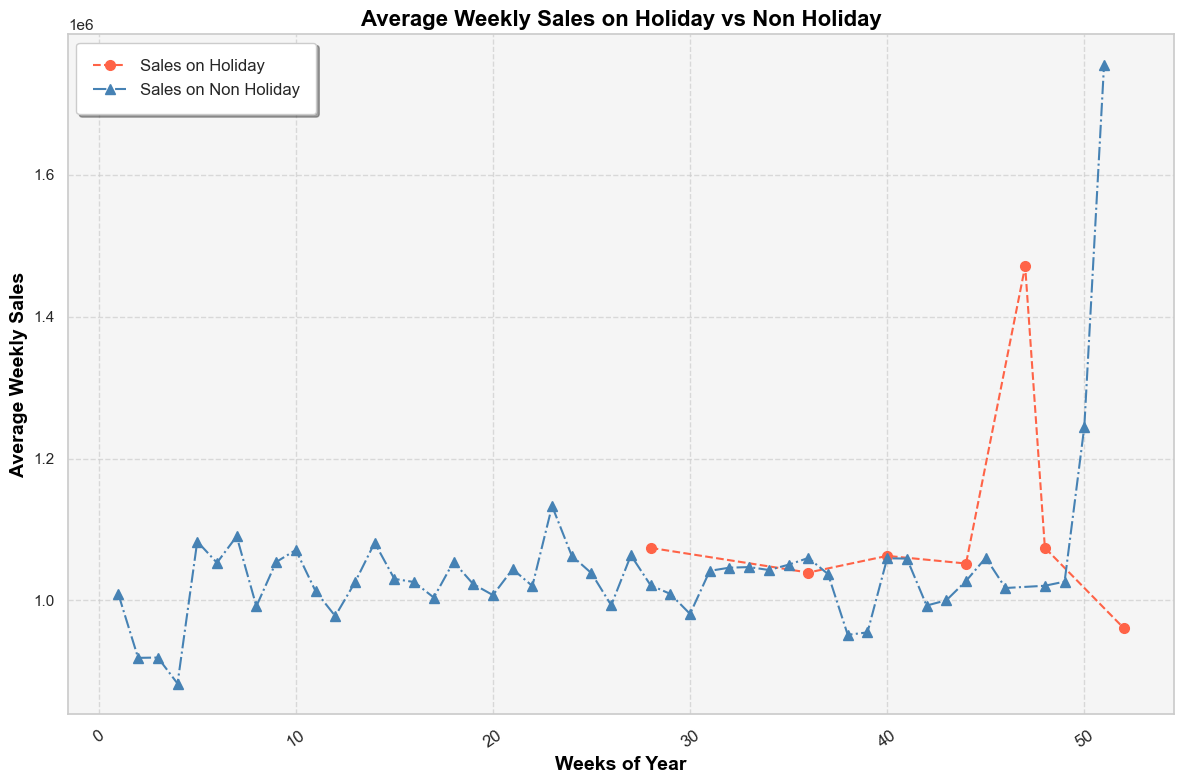

In [10]:
# 2. How do Weekly_Sales vary on holidays compared to non-holidays?

#Filtering data by holiday or non-holiday
weekly_sales_holiday = df[df["Holiday_Flag"] == True].groupby("Weeks")["Weekly_Sales"].mean()
weekly_sales_Nonholiday = df[df["Holiday_Flag"] == False].groupby("Weeks")["Weekly_Sales"].mean()

# Plotting line graph
plt.figure(figsize=(12,8))
plt.plot(weekly_sales_holiday.index, weekly_sales_holiday.values, label="Sales on Holiday", ls= "--", 
         linewidth= 1.5, marker= "o", markersize= 7, color="#FF6347")

plt.plot(weekly_sales_Nonholiday.index, weekly_sales_Nonholiday.values, label="Sales on Non Holiday", ls="-.", 
         lw= 1.5, marker= "^", markersize= 7, color= "#4682B4")

plt.xlabel("Weeks of Year", fontsize= 14, fontweight= "bold", color= "black")
plt.ylabel("Average Weekly Sales", fontsize= 14, fontweight= "bold", color= "black")
plt.title("Average Weekly Sales on Holiday vs Non Holiday", fontsize= 16, fontweight= "bold", color= "black")
plt.xticks(rotation= 34, fontsize= 12)
plt.grid(True, ls="--", alpha= 0.7)
plt.gca().set_facecolor("whitesmoke")
plt.legend(frameon=True, fontsize=12, loc='best', shadow=True, borderpad=1)

#Saving image
plt.savefig("Sales_Holidays_vs_NonHoliday")

plt.tight_layout()
plt.show()

C:\Users\ashis\AppData\Local\Temp\ipykernel_2208\3550857689.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_val_store_hig.index, y = avg_val_store_hig.values, palette="viridis", ax= fig1)
C:\Users\ashis\AppData\Local\Temp\ipykernel_2208\3550857689.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_val_store_low.index, y = avg_val_store_low.values, palette= "coolwarm", ax= fig2)


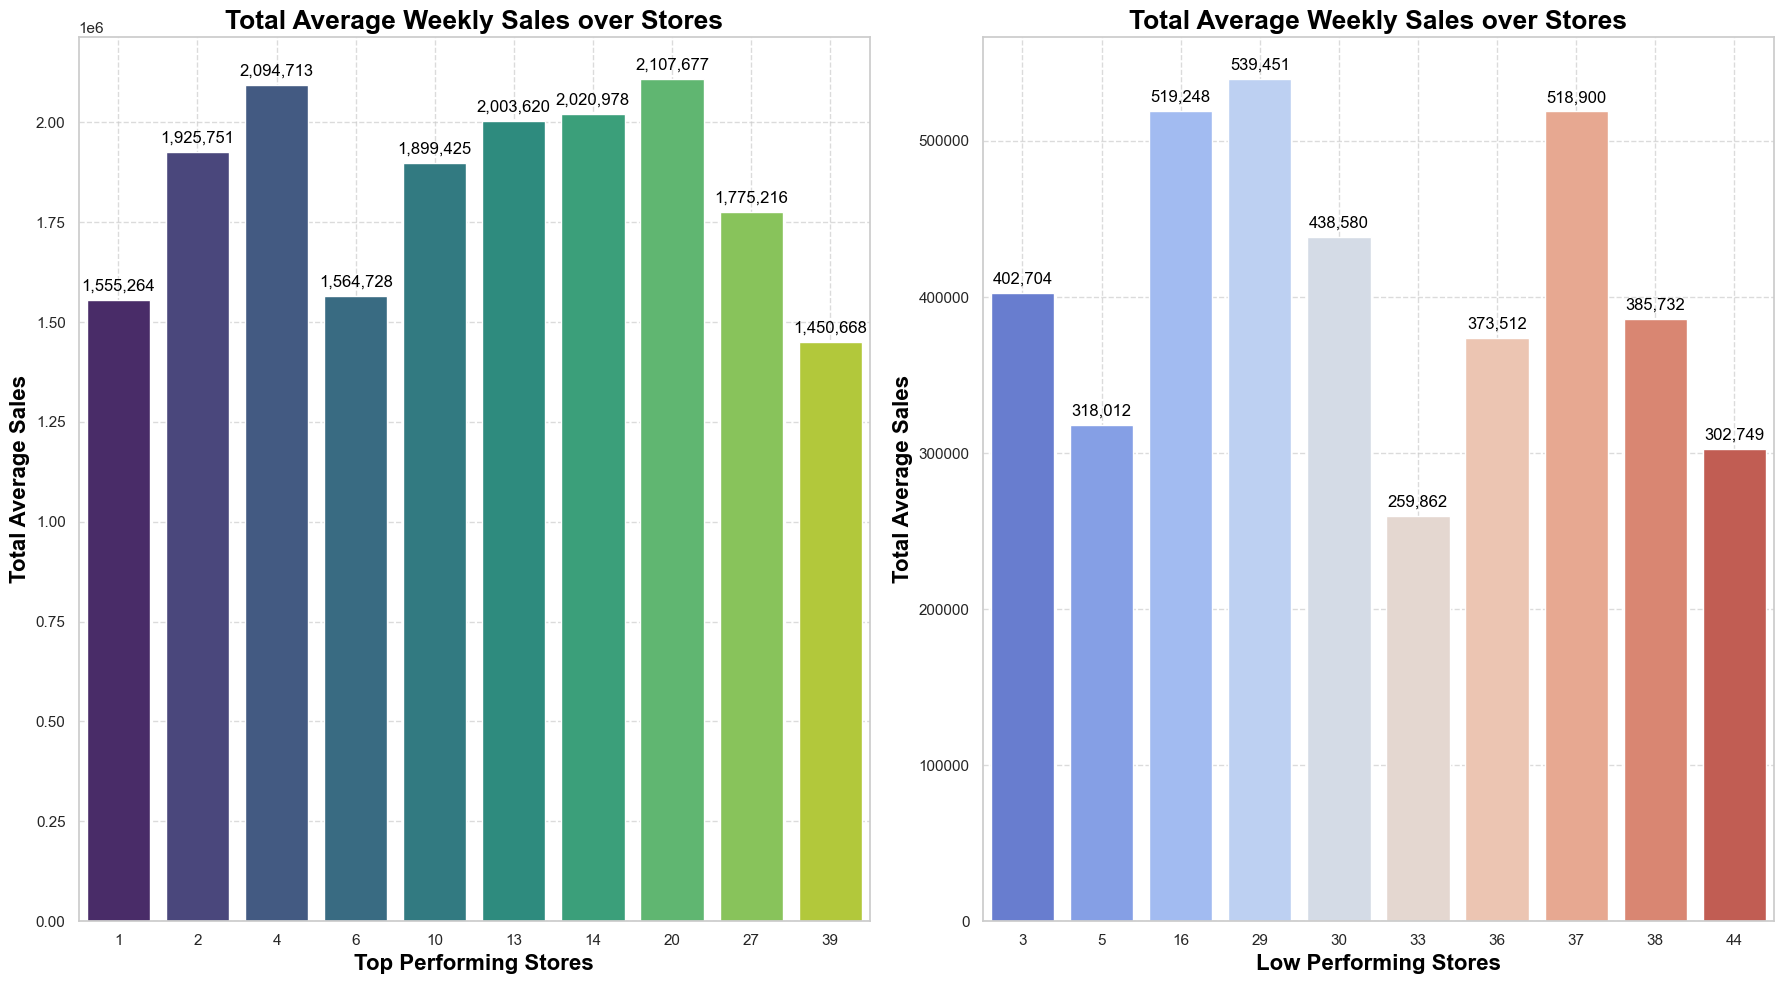

In [11]:
# 3. What is the average Weekly_Sales for each store?

# Top 10 stores by highest average weekly sales
avg_val_store_hig = df.groupby("store")["Weekly_Sales"].mean().sort_values(ascending= False).head(10)

# Top 10 stores by lowest average weekly sales
avg_val_store_low = df.groupby("store")["Weekly_Sales"].mean().sort_values(ascending= False).tail(10)

#Visualization

sns.set(style="whitegrid")
fig, (fig1, fig2) = plt.subplots(1,2, figsize= (18,10))

sns.barplot(x = avg_val_store_hig.index, y = avg_val_store_hig.values, palette="viridis", ax= fig1)
fig1.set_xlabel("Top Performing Stores", fontsize= 16, fontweight= "bold", color= "black")
fig1.set_ylabel("Total Average Sales", fontsize= 16, fontweight= "bold", color= "black")
fig1.set_title("Total Average Weekly Sales over Stores", fontsize= 19, fontweight= "bold", color= "black")
fig1.grid(True, ls= "--", alpha= 0.7)

for p in fig1.patches:
    fig1.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')


sns.barplot(x = avg_val_store_low.index, y = avg_val_store_low.values, palette= "coolwarm", ax= fig2)
fig2.set_xlabel("Low Performing Stores", fontsize= 16, fontweight= "bold", color= "black")
fig2.set_ylabel("Total Average Sales", fontsize= 16, fontweight= "bold", color= "black")
fig2.set_title("Total Average Weekly Sales over Stores", fontsize= 19, fontweight= "bold", color= "black")
fig2.grid(True, ls= "--", alpha= 0.7)

for p in fig2.patches:
    fig2.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

#Saving image
plt.savefig("Top_vs_low_performing.png")



plt.tight_layout()
plt.show()


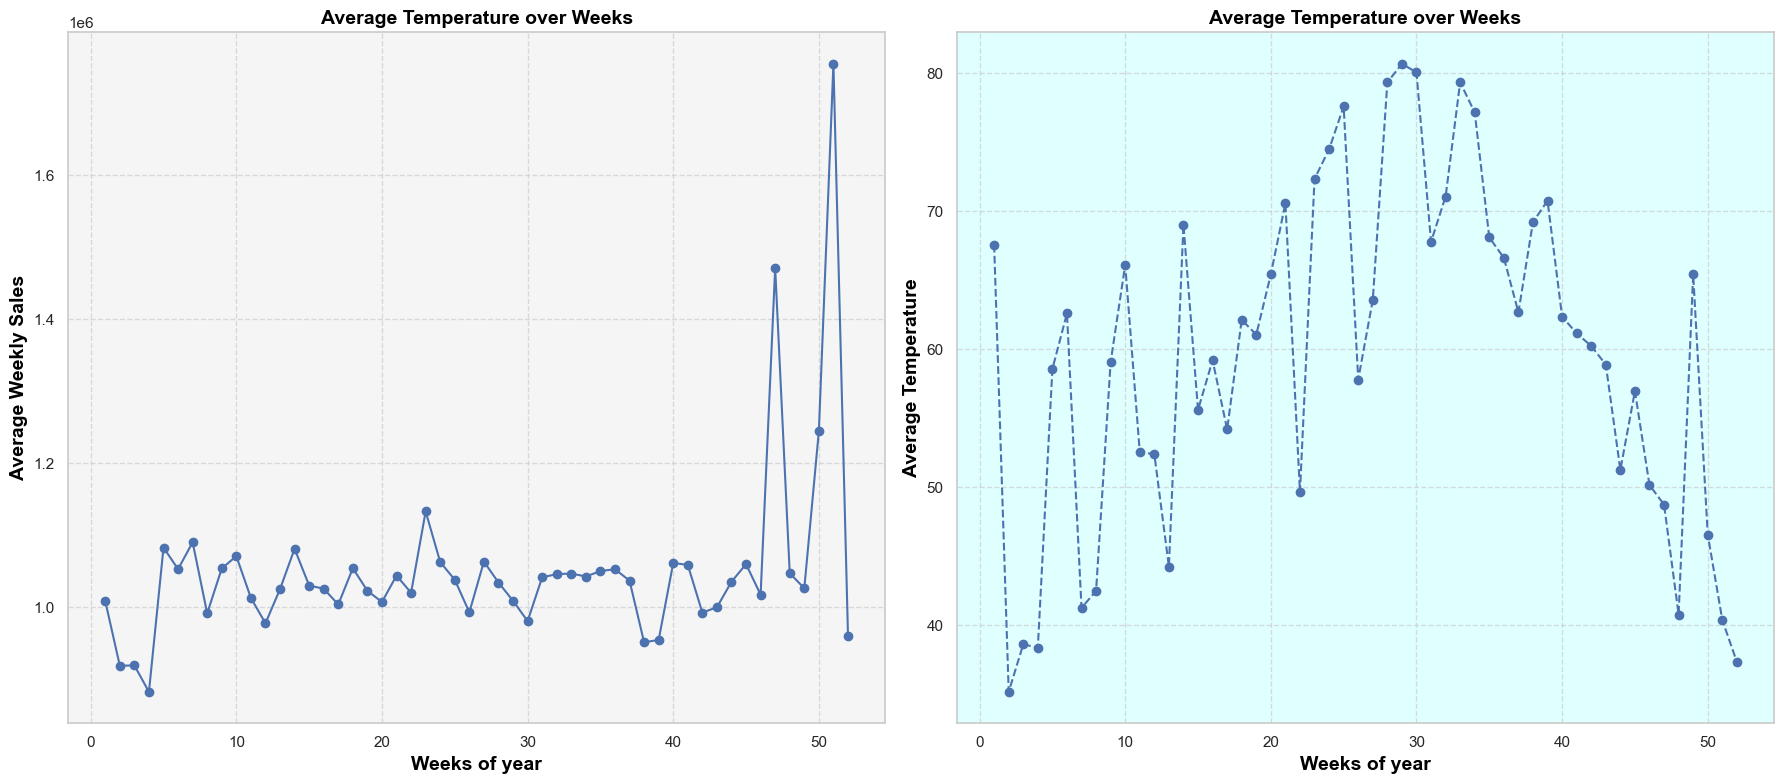

In [205]:
# 4. Is there a seasonal pattern in Weekly_Sales based on the temperature or time of the year?

# Grouping data
avg_sales = df.groupby("Weeks")["Weekly_Sales"].mean()
avg_temp = df.groupby("Weeks")["Temperature"].mean()

fig, (fig1, fig2) = plt.subplots(1,2, figsize= (18,8))

fig1.plot(avg_sales.index, avg_sales.values, marker= "o", markersize= 6)
fig1.set_xlabel("Weeks of year", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_ylabel("Average Weekly Sales", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_title("Average Temperature over Weeks", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_facecolor("whitesmoke")
fig1.grid(True, linestyle="--", alpha=0.7)


fig2.plot(avg_temp.index, avg_temp.values, marker= "o", markersize= 6, ls= "--")
fig2.set_xlabel("Weeks of year", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_ylabel("Average Temperature", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_title("Average Temperature over Weeks", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_facecolor('lightcyan')
fig2.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\ashis\AppData\Local\Temp\ipykernel_21876\1049961733.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig1.set_xticklabels(gr.index, rotation=45, ha='right')


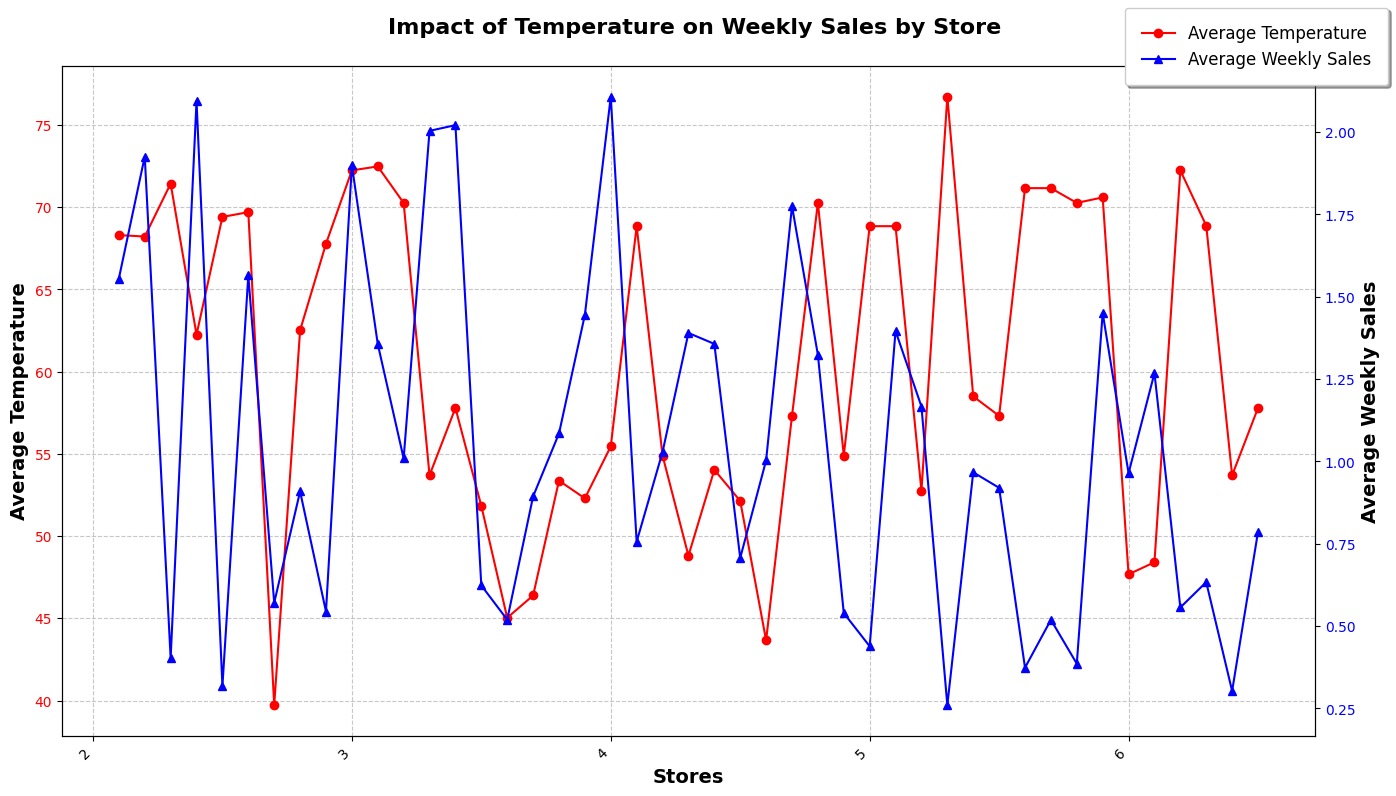

In [18]:
# Advanced Level:

# 1. How does the impact of Temperature on Weekly_Sales differ by store?
gr = df.groupby("store")["Temperature"].mean()
br = df.groupby("store")["Weekly_Sales"].mean()

fig, fig1 = plt.subplots(figsize= (14,8))

# Plotting Temperature
fig1.plot(gr.index, gr.values, color= "red", label = "Average Temperature", marker= "o", markersize= 6)
fig1.set_xlabel("Stores", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_ylabel("Average Temperature", fontsize= 14, fontweight= "bold", color= "black")
fig1.tick_params(axis='y', labelcolor="red")
fig1.set_xticklabels(gr.index, rotation=45, ha='right')

fig2 = fig1.twinx()
fig2.plot(br.index, br.values, color= "blue", label= "Average Weekly Sales", marker= "^", markersize= 6)
fig2.set_ylabel('Average Weekly Sales', fontsize=14, fontweight='bold')
fig2.tick_params(axis="y", labelcolor= "blue")

fig1.grid(True, linestyle='--', alpha=0.7)
fig.suptitle('Impact of Temperature on Weekly Sales by Store', fontsize=16, fontweight='bold')
fig.legend(frameon=True, fontsize=12, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()


In [33]:
# 2. Can we predict Weekly_Sales using variables such as Temperature, Fuel_Price, CPI, and Unemployment? If so, which variable is the most significant predictor?

print("Yes, we can predict `Weekly_Sales` using variables such as Temperature, Fuel_Price, CPI, and Unemployment. There are several methods \nand models available to achieve this, including:")

print(" - Linear Regression: Simple or multiple regression models to assess the relationship between `Weekly_Sales` and the predictor variables.")
print("  - Time Series Models: Models such as ARIMA with exogenous variables (ARIMAX) or SARIMAX can incorporate these predictors into a time series framework.")
print("  - Machine Learning Models: Techniques like Random Forest, Gradient Boosting Machines, and XGBoost can provide insights into variable importance.")
print("  - Neural Networks: Advanced models like LSTM networks can be used for time series forecasting with multiple predictors.")

print("To determine the most significant variable, one must perform an empirical analysis. Typically, this involves:")
print("   - Fitting various models and evaluating their performance.")
print("   - Using feature importance metrics or regression coefficients to assess the impact of each variable.")

print("In practice, the significance of each variable can vary based on the specific dataset and context. Therefore, it’s crucial to conduct this analysis to identify which variable is most influential for predicting `Weekly_Sales`.")


Yes, we can predict `Weekly_Sales` using variables such as Temperature, Fuel_Price, CPI, and Unemployment. There are several methods 
and models available to achieve this, including:
 - Linear Regression: Simple or multiple regression models to assess the relationship between `Weekly_Sales` and the predictor variables.
  - Time Series Models: Models such as ARIMA with exogenous variables (ARIMAX) or SARIMAX can incorporate these predictors into a time series framework.
  - Machine Learning Models: Techniques like Random Forest, Gradient Boosting Machines, and XGBoost can provide insights into variable importance.
  - Neural Networks: Advanced models like LSTM networks can be used for time series forecasting with multiple predictors.
To determine the most significant variable, one must perform an empirical analysis. Typically, this involves:
   - Fitting various models and evaluating their performance.
   - Using feature importance metrics or regression coefficients to assess the impact

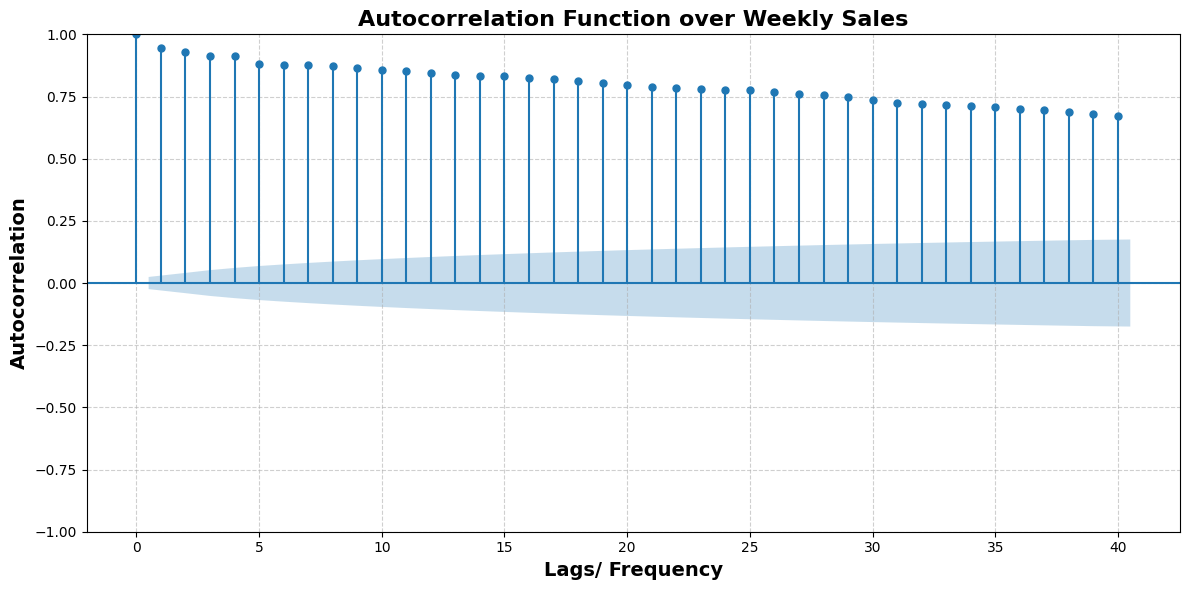

In [10]:
# 3. Is there any evidence of autocorrelation in Weekly_Sales over time, and how might this affect future sales forecasting?

plt.figure(figsize=(12,6))

plot_acf(df["Weekly_Sales"], lags= 40, ax= plt.gca())
plt.xlabel("Lags/ Frequency", fontsize= 14, fontweight= "bold", color= "black")
plt.ylabel("Autocorrelation", fontsize= 14, fontweight= "bold", color= "black")
plt.title("Autocorrelation Function over Weekly Sales", fontsize= 16, fontweight= "bold", color= "black")
plt.grid(True, ls="--", alpha = 0.6)

plt.tight_layout()
plt.show()


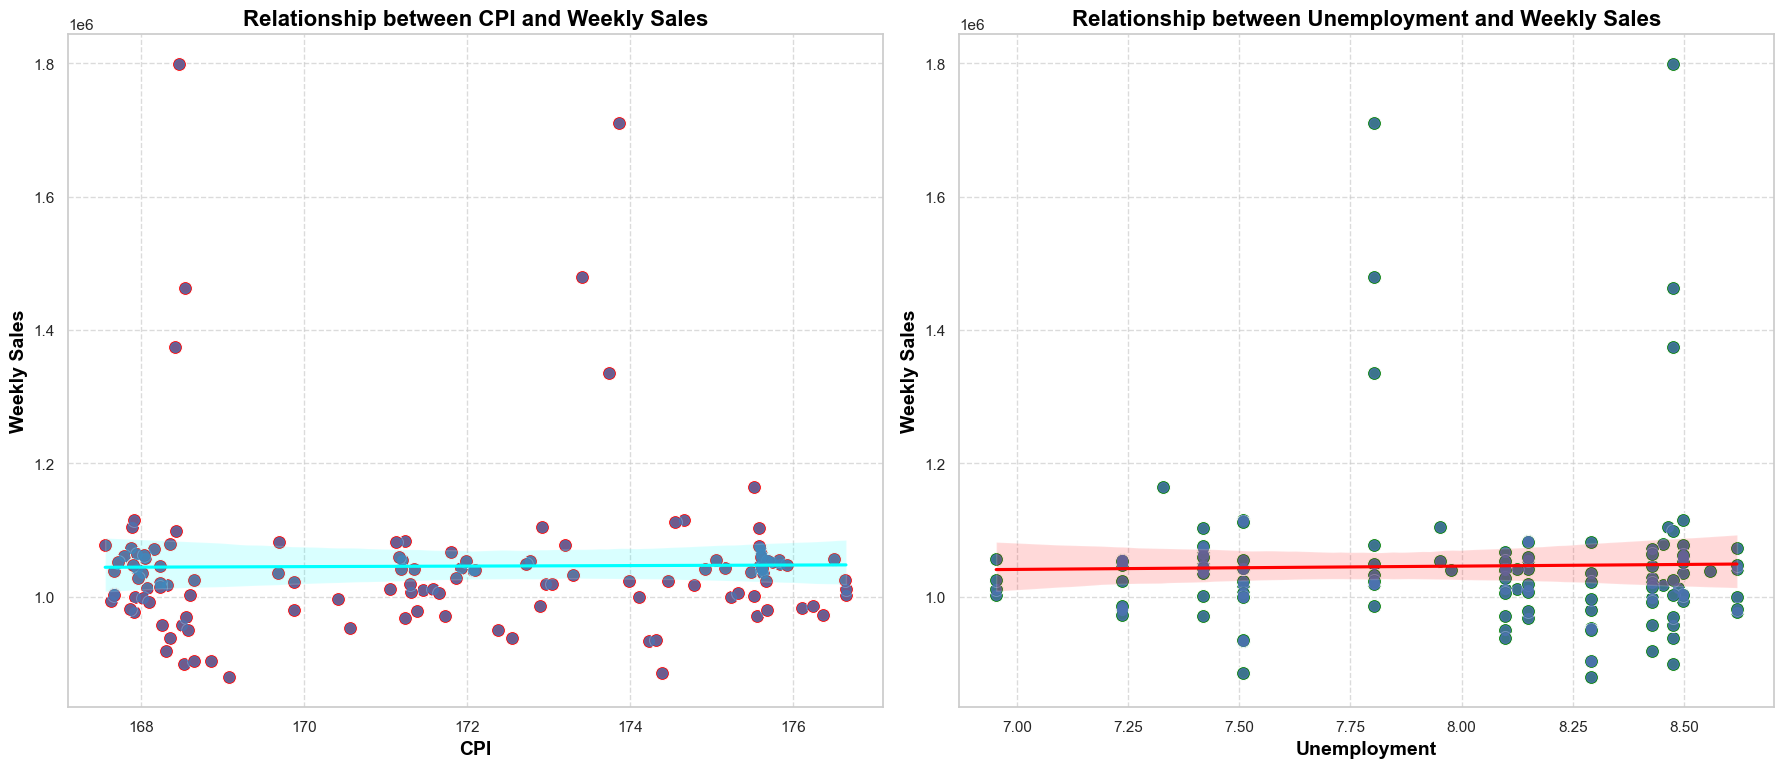

In [186]:
# 4. How does the variability of Weekly_Sales change with different levels of CPI and Unemployment?

#Creating year column
df["Year"] = df["Date1"].dt.year

# Aggregating data basis of weeks for better and clear visualization
ddf = df.groupby(["Year","Weeks"]).agg({"Weekly_Sales":"mean","CPI":"mean", "Unemployment":"mean"}).reset_index()

# Creating scatter plots with regression lines for each variable
fig, (fig1, fig2) = plt.subplots(1,2,figsize=(18, 8))

sns.scatterplot(x = ddf["CPI"], y = ddf["Weekly_Sales"], ax= fig1, color= "red", s= 100, edgecolor= "w")
sns.regplot(x = ddf["CPI"], y = ddf["Weekly_Sales"], ax= fig1, scatter_kws={'s':50}, line_kws={'color':'cyan'})
fig1.set_xlabel("CPI", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_ylabel("Weekly Sales", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_title("Relationship between CPI and Weekly Sales", fontsize= 16, fontweight= "bold", color= "black")
fig1.grid(True, linestyle='--', alpha=0.7)

sns.scatterplot(x = ddf["Unemployment"], y = ddf["Weekly_Sales"], ax= fig2, color= "green", s= 100, edgecolor= "w")
sns.regplot(x = ddf["Unemployment"], y = ddf["Weekly_Sales"], ax= fig2, scatter_kws={'s':50}, line_kws={'color':'red'})
fig2.set_xlabel("Unemployment", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_ylabel("Weekly Sales", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_title("Relationship between Unemployment and Weekly Sales", fontsize= 16, fontweight= "bold", color= "black")
fig2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
